In [1]:
import pyrealsense2 as rs
import cv2
import matplotlib.pyplot as plt
import numpy as np

## Creating Depth and Color Images

In [2]:
width = 1280
height = 720
fps = 30

In [3]:
pipeline = rs.pipeline()
config = rs.config()
config.enable_stream(rs.stream.depth, width, height, rs.format.z16, fps)
config.enable_stream(rs.stream.color, width, height, rs.format.rgb8, fps)

In [18]:
profile = pipeline.start(config)

In [19]:
align_to = rs.stream.color
align = rs.align(align_to)

In [20]:
frames = pipeline.wait_for_frames()

In [21]:
aligned_frames = align.process(frames)

depth_frame = aligned_frames.get_depth_frame()
color_frame = aligned_frames.get_color_frame()

depth_image = np.asanyarray(depth_frame.get_data())
color_image = np.asanyarray(color_frame.get_data())

In [105]:
np.min(depth_image), np.max(depth_image)

(0, 65276)

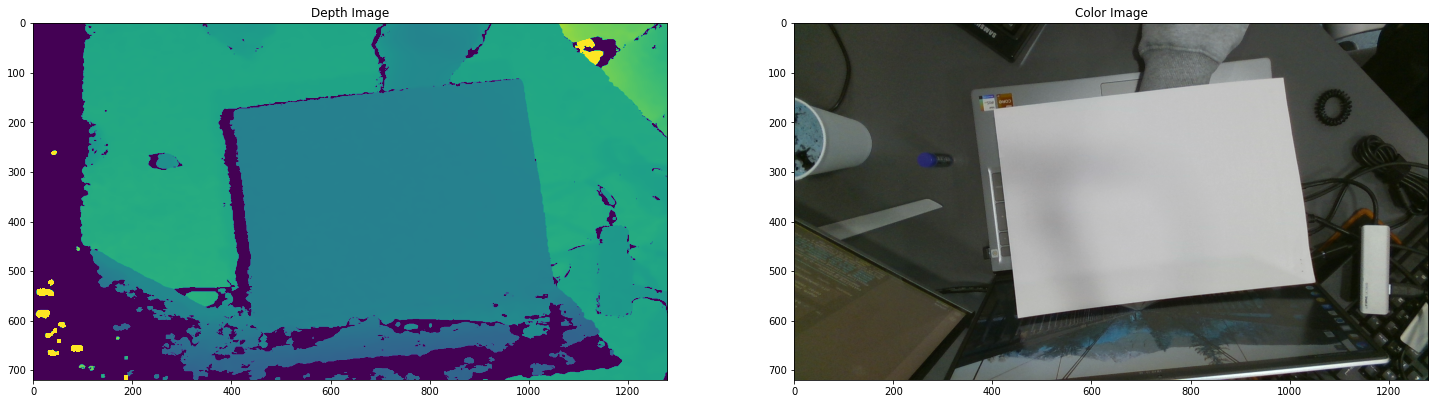

In [110]:
fig = plt.figure(figsize=(25,10))
row = 1
col = 2

ax1 = fig.add_subplot(row,col,1)
ax1.imshow(depth_image, vmin=200, vmax=800)
ax1.set_title("Depth Image")

ax2 = fig.add_subplot(row,col,2)
ax2.imshow(color_image)
ax2.set_title("Color Image")

plt.show()

In [24]:
pipeline.stop()

## Image Extraction

In [62]:
def mouse_handler(event,x,y,flag,data):
    if event == cv2.EVENT_FLAG_LBUTTON:
        cv2.circle(data['im'],(x,y),3,(0,255,0),5,16)
        cv2.imshow("Image",data["im"])
        if len(data["points"]) < 4:
            data['points'].append([x,y])
    
def get_four_points(im):
    data = {}
    data['im'] = im.copy()
    data['points'] = []

    cv2.imshow("Image",im)
    cv2.setMouseCallback("Image",mouse_handler,data)
    cv2.waitKey(0)

    points = np.array(data['points'],dtype=float)
    return points


In [101]:
cv2.imshow("Image", cv2.cvtColor(color_image,cv2.COLOR_RGB2BGR))

points_src = get_four_points(color_image)

cv2.waitKey(0)
cv2.destroyAllWindows()

QObject::moveToThread: Current thread (0x56393b766970) is not the object's thread (0x56393bf24b40).
Cannot move to target thread (0x56393b766970)

QObject::moveToThread: Current thread (0x56393b766970) is not the object's thread (0x56393bf24b40).
Cannot move to target thread (0x56393b766970)

QObject::moveToThread: Current thread (0x56393b766970) is not the object's thread (0x56393bf24b40).
Cannot move to target thread (0x56393b766970)

QObject::moveToThread: Current thread (0x56393b766970) is not the object's thread (0x56393bf24b40).
Cannot move to target thread (0x56393b766970)

QObject::moveToThread: Current thread (0x56393b766970) is not the object's thread (0x56393bf24b40).
Cannot move to target thread (0x56393b766970)

QObject::moveToThread: Current thread (0x56393b766970) is not the object's thread (0x56393bf24b40).
Cannot move to target thread (0x56393b766970)

QObject::moveToThread: Current thread (0x56393b766970) is not the object's thread (0x56393bf24b40).
Cannot move to tar

In [102]:
points_src

array([[ 401.,  174.],
       [ 451.,  594.],
       [1051.,  526.],
       [ 984.,  111.]])

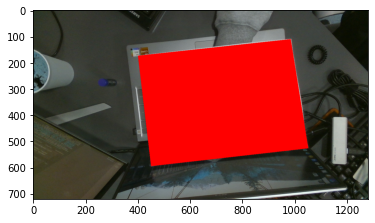

In [115]:
cv2.fillPoly(color_image, np.int32([points_src]), 255)
plt.imshow(color_image)